In [ ]:
! pip install  squarify


# Part 01: Buidling N-gram Model

1 Build an n-gram language model using NLTK's Brown corpus. Provide
the code. (You can build a language model in a few lines of code using
the NLTK package. You may use one of the bigram, trigram, or higherorder n-grams). (15 pts)

An n-gram model is a type of probabilistic language model used in Natural Language Processing (NLP) to predict the next item in a sequence based on the preceding
n−1 items. In simpler terms, it estimates the likelihood of a word given its history in terms of the previous
n−1 words. N-gram models are foundational in various NLP tasks, including speech recognition, text prediction, and machine translation.

In [ ]:
# Importing essential libraries and module

# 're' module provides support for regular expressions in Python, allowing pattern matching within text.
import re

# 'string' module includes various string operations and constants, such as punctuation handling.
import string

# 'nltk' (Natural Language Toolkit) is a powerful Python library for natural language processing tasks.
import nltk

# Importing the 'brown' corpus from nltk, which is a collection of text samples useful for linguistic research.
from nltk.corpus import brown

# 'ngrams' from nltk.util generates sequences of 'n' items from a list of words, which is useful for analyzing word patterns.
from nltk.util import ngrams

# 'matplotlib.pyplot' provides functions to create visualizations like plots, charts, and graphs in Python.
import matplotlib.pyplot as plt

# 'pandas' is a data analysis and manipulation library, offering DataFrame structures to manage data efficiently.
import pandas as pd

# 'seaborn' is built on top of matplotlib, offering more aesthetic and informative statistical data visualizations.
import seaborn as sns

# 'squarify' library is used for creating tree maps, which are a way of visualizing hierarchical data as a set of nested rectangles.
import squarify

# 'Counter' and defaultdict from the collections module is useful for counting hashable objects, like occurrences of words in a text.
from collections import Counter,defaultdict

# 'random' module provides functions to generate random numbers, which can be useful for sampling and data randomization.
import random

# 'math' module includes mathematical functions and constants, helpful for computations in data analysis.
import math

# 'numpy' is a fundamental library for scientific computing, especially useful for handling arrays and numerical data.
import numpy as np

# 'FreqDist' from nltk.probability is a class to calculate frequency distributions of items like words in a corpus.
from nltk.probability import FreqDist

# 'word_tokenize' is a function from nltk.tokenize that splits sentences or phrases into individual words or tokens.
from nltk.tokenize import word_tokenize

# Downloading essential NLTK resources

# Download the 'brown' corpus from nltk, a large corpus of American English from the 1960s, useful for a variety of NLP tasks.
nltk.download('brown')

# Download the 'punkt' tokenizer models, pre-trained models used for sentence and word tokenization.
nltk.download('punkt')


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Get the Brown Dataset


In [ ]:
# Get sentences from the Brown corpus
sentences = brown.sents()

# Print the total number of sentences in the Brown corpus
print(f"Number of sentences in the Brown corpus: {len(sentences)}")

# Display the sentences
sentences


Number of sentences in the Brown corpus: 57340


[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

# Analysis the Text


In [ ]:

class TextAnalysis:
    """Class for analyzing text data.

    This class provides methods to perform basic text analysis on a given list of sentences.
    It can calculate the total number of words, total number of sentences, count word occurrences,
    determine the number of punctuation marks, and find the most common words.
    """

    def __init__(self, sentences):
        """Initializes the TextAnalysis object with a list of sentences.

        Args:
            sentences (list of list of str): A list where each element is a sentence represented
                as a list of words.
        """
        # Store the list of sentences passed to the class in an instance variable for later use.
        self.sentences = sentences

    def get_total_words(self):
        """Calculates the total number of words in all sentences.

        Returns:
            int: Total number of words.
        """
        # Sum the length of each sentence in self.sentences to get the total word count.
        total_words = sum(len(sentence) for sentence in self.sentences)
        return total_words  # Return the total word count.

    def get_total_sentences(self):
        """Calculates the total number of sentences.

        Returns:
            int: Total number of sentences.
        """
        # Get the number of sentences by finding the length of self.sentences.
        total_sentences = len(self.sentences)
        return total_sentences  # Return the total sentence count.

    def count_words(self):
        """Counts the occurrences of each word in all sentences.

        Returns:
            collections.Counter: A Counter object mapping words to their counts.
        """
        # Initialize an empty Counter object to store word frequencies.
        word_counts = Counter()

        # Loop through each sentence in the list of sentences.
        for sentence in self.sentences:
            # Loop through each word in the sentence.
            for word in sentence:
                # Increment the count for this word in word_counts.
                word_counts[word] += 1

        # Return the Counter object containing word counts.
        return word_counts

    def get_number_of_punctuation(self):
        """Counts the total number of punctuation marks in all sentences.

        Returns:
            int: Total number of punctuation marks.
        """
        # Count punctuation marks by iterating over each word in each sentence,
        # and summing up only those that match any punctuation character.
        punctuation_count = sum(
            1  # Count each punctuation mark found
            for sentence in self.sentences  # Loop through each sentence
            for word in sentence  # Loop through each word in each sentence
            if word in string.punctuation  # Check if the word is a punctuation mark
        )

        # Return the total count of punctuation marks.
        return punctuation_count

    def get_most_common_words(self, n=100):
        """Finds the most common words across all sentences.

        Args:
            n (int, optional): The number of top common words to return. Defaults to 100.

        Returns:
            list of tuple: A list of tuples containing words and their counts.
        """
        # Count all words using the count_words method.
        word_counts = self.count_words()

        # Get the 'n' most common words from word_counts, returning as a list of tuples.
        most_common_words = word_counts.most_common(n)

        # Return the list of most common words and their frequencies.
        return most_common_words

    def __call__(self):
        """Executes all analysis methods and returns their results.

        Returns:
            tuple: A tuple containing total words, total sentences, word counts,
                most common words, and punctuation count.
        """
        # Call each method to perform the respective analysis and collect the results.
        total_words = self.get_total_words()  # Total word count.
        total_sentences = self.get_total_sentences()  # Total sentence count.
        word_counts = self.count_words()  # Word counts as a Counter object.
        most_common_words = self.get_most_common_words()  # Top 100 most common words.
        punctuation_count = self.get_number_of_punctuation()  # Total punctuation count.

        # Return all results as a tuple, summarizing the text analysis.
        return (
            total_words,  # Total words in all sentences.
            total_sentences,  # Total number of sentences.
            word_counts,  # Dictionary-like Counter object of word counts.
            most_common_words,  # List of most common words and their counts.
            punctuation_count,  # Total punctuation mark count.
        )


In [ ]:
# Instantiate the TextAnalysis class with the list of sentences.
analysis = TextAnalysis(sentences)

# Call the instance to execute all analysis methods and unpack the results.
# The __call__ method is implicitly called here, which executes all the analysis functions.
total_words, total_sentences, word_counts, most_common_words, punctuation_count = analysis()


In [ ]:
print(f"Total words in the Brown corpus: {total_words}")
print(f"Total sentences in the Brown corpus: {total_sentences}")
print(f"Number of punctuation in the Brown corpus: {punctuation_count}")
print(f"Number of unique words in the Brown corpus: {len(word_counts)}")
print(f"Number of most common words in the Brown corpus: {len(most_common_words)}")


Total words in the Brown corpus: 1161192
Total sentences in the Brown corpus: 57340
Number of punctuation in the Brown corpus: 126814
Number of unique words in the Brown corpus: 56057
Number of most common words in the Brown corpus: 100


Text(0, 0.5, 'Count')

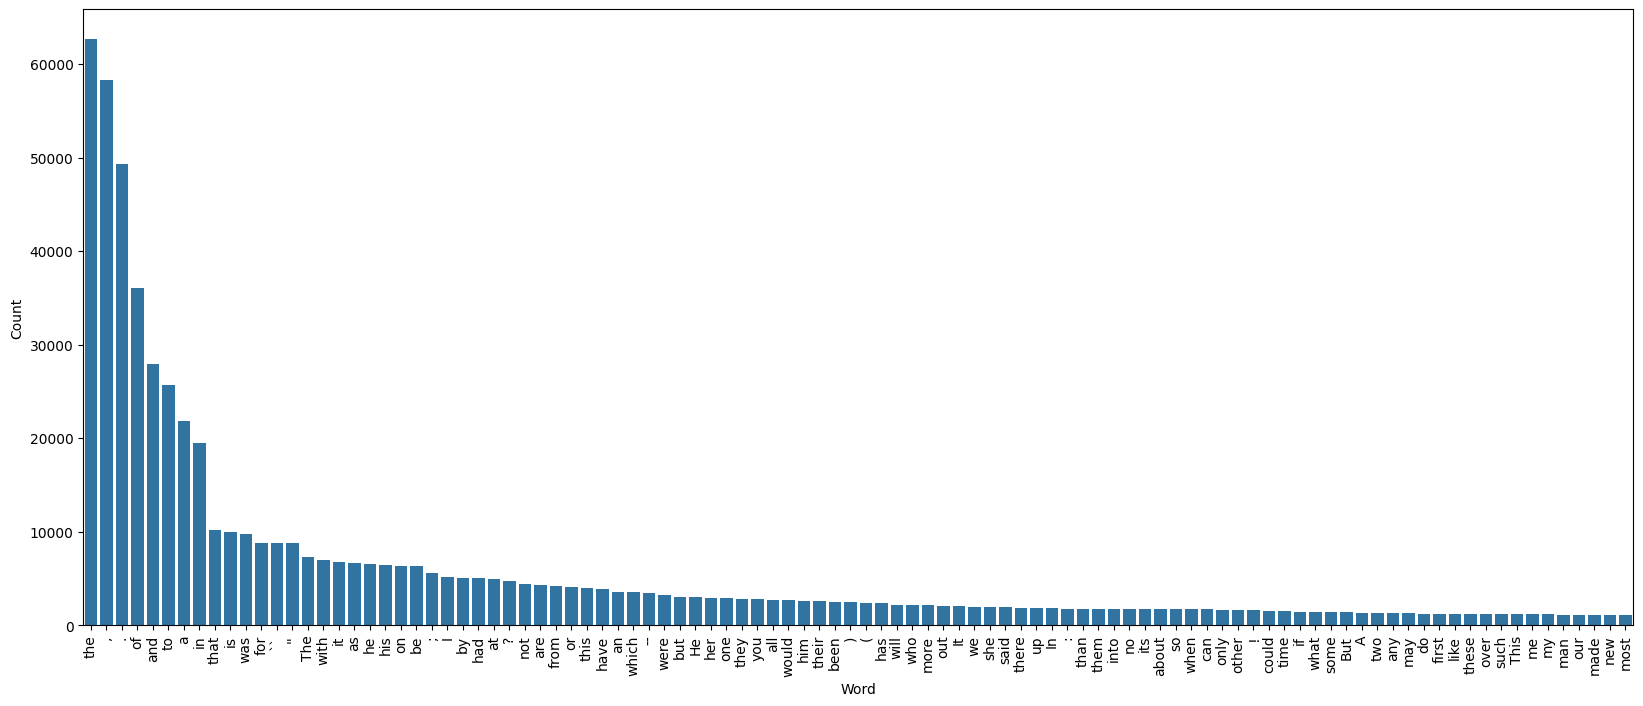

In [ ]:
# plot the word_counts using seaborn
df = pd.DataFrame(list(word_counts.items()), columns=['word', 'count'])
df = df.sort_values(by='count', ascending=False)
plt.figure(figsize=(20, 8))
sns.barplot(x='word', y='count', data=df[:100])
plt.xticks(rotation=90)
plt.xlabel('Word')
plt.ylabel('Count')

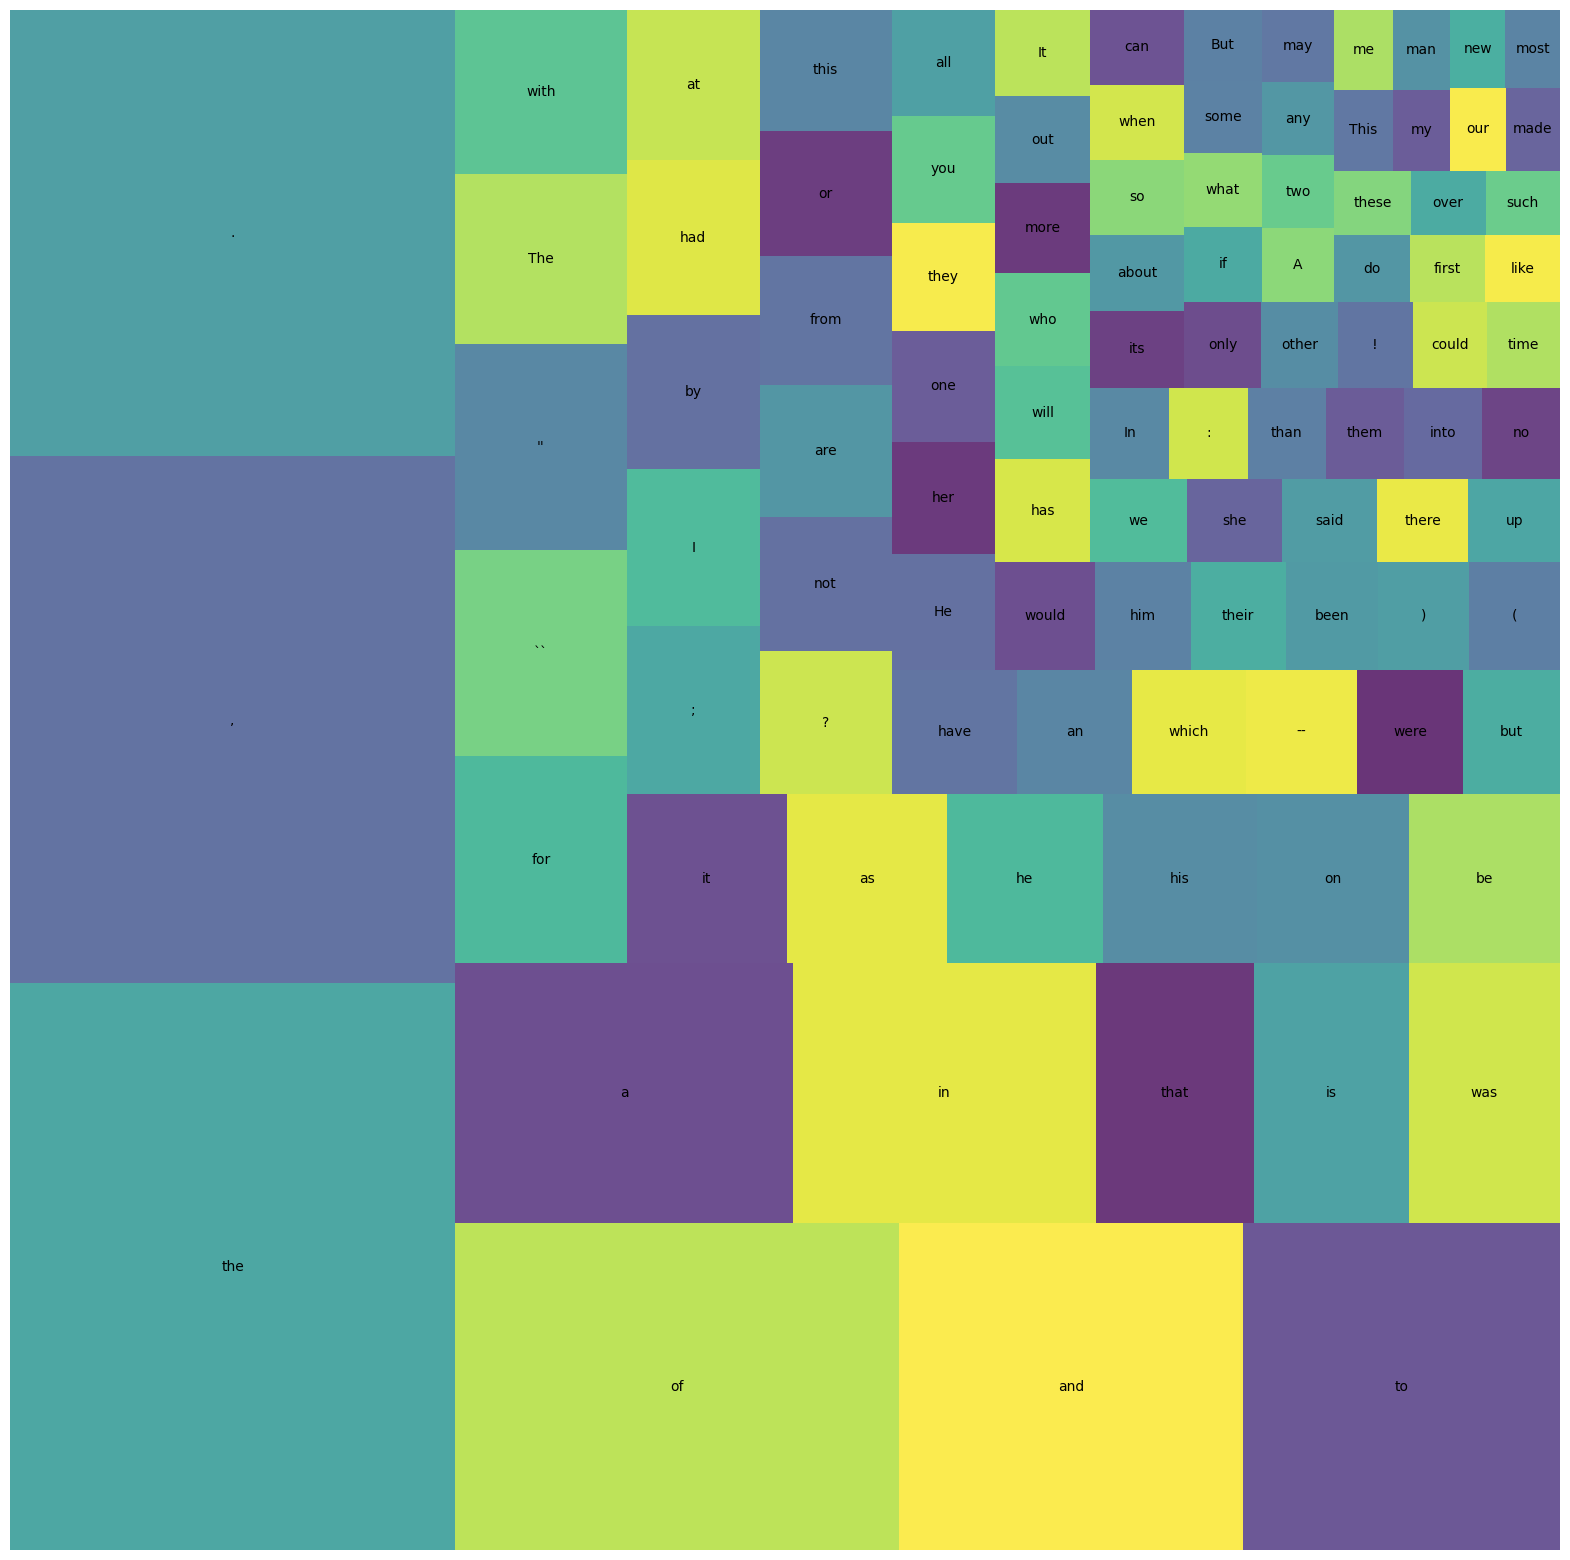

In [ ]:
# plot the word_counts using seaborn and squarify as treemap
df = pd.DataFrame(list(word_counts.items()), columns=['word', 'count'])
df = df.sort_values(by='count', ascending=False).iloc[:100]
plt.figure(figsize=(20, 20))
squarify.plot(sizes=df['count'].values, label=df['word'].values, alpha=.8)
plt.axis('off')
plt.show()



# Pre-Processing the Sentences


## In this cell, we'll explain the need for text cleaning based on the text analysis results:

---

### Text Cleaning: Removing Punctuation

In the text analysis phase, I observed that punctuation marks contributed significantly to the overall word count and frequency distributions. Punctuation, while essential for human readability, can interfere with text processing in machine learning and natural language processing (NLP) tasks. By removing punctuation, reducing noise in the data, allowing models to focus on meaningful words and improving performance on downstream tasks like text generation, sentiment analysis, and language modeling.

Removing punctuation helps to:

1. **Simplify Word Count Analysis**: Without punctuation, words are counted more accurately, ensuring a cleaner representation of the language's structure.
2. **Improve Model Accuracy**: Text models trained on cleaned data tend to generalize better, as they focus on semantic content rather than extraneous symbols.
3. **Enhance Consistency**: Consistent data pre-processing, like punctuation removal, aligns with industry standards and best practices in NLP.

Therefore, I'll proceed to clean the text data by removing punctuation to improve data quality for further analysis and modeling.

In [ ]:

class Preprocessing:
    """Class for preprocessing text data.

    This class provides methods to clean and preprocess text sentences.
    It includes normalization steps such as converting to lowercase, removing
    punctuation, emails, URLs, and extra whitespace. It also adds start and end
    tokens to sentences.
    """

    def __init__(self):
        """Initializes the Preprocessing object."""
        pass  # No specific initialization needed in this class

    def clean_text(self, text):
        """Cleans a single text string.

        Applies the following cleaning steps:
        - Converts text to lowercase.
        - Removes punctuation.
        - Removes email addresses.
        - Removes URLs starting with 'http' or 'https'.
        - Removes extra whitespace.

        Args:
            text (str): The text string to clean.

        Returns:
            str or None: The cleaned text string, or None if the text is too short
            after cleaning.
        """
        # Convert the entire text to lowercase to ensure consistency
        text = text.lower()

        # Remove punctuation by matching any character that is not a word character or whitespace
        text = re.sub(r'[^\w\s]', '', text)

        # Remove email addresses by matching patterns with '@' and spaces around them
        text = re.sub(r'\S*@\S*\s?', '', text)

        # Remove URLs by matching strings starting with 'http' or 'https' and followed by non-whitespace characters
        text = re.sub(r'http\S+', '', text)

        # Remove extra whitespace by splitting the text into words and joining them back with single spaces
        text = " ".join(text.split())

        # If the cleaned text is too short (1 character or less), return None
        if len(text) <= 1:
            return None
        else:
            return text  # Return the cleaned text if it meets length requirements

    def preprocess_sentences(self, sentences):
        """Preprocesses a list of sentences.

        Cleans each sentence and adds start and end tokens.

        Args:
            sentences (list of str): The list of sentences to preprocess.

        Returns:
            list of str: The list of preprocessed sentences.
        """
        # Clean all sentences using the clean_text method and filter out None values
        cleaned_sentences = list(filter(None, map(self.clean_text, sentences)))

        # Add start and end tokens to each cleaned sentence
        cleaned_sentences = list(map(self.add_start_and_end, cleaned_sentences))

        # Return the list of preprocessed sentences with start and end tokens
        return cleaned_sentences

    def add_start_and_end(self, text):
        """Adds start and end tokens to a text string.

        Args:
            text (str): The text string to modify.

        Returns:
            str: The text string with start and end tokens added.
        """
        # Concatenate start token '<s>' and end token '</s>' to the text
        text = '<s> ' + text + ' </s>'

        # Return the modified text with start and end tokens
        return text

    def __call__(self, sentences):
        """Processes a list of sentences and returns tokenized sentences.

        If the input sentences are lists of words, they are joined into strings first.
        Then they are cleaned, have start and end tokens added, and are tokenized.

        Args:
            sentences (list): The list of sentences to process. Each sentence can be
                a string or a list of words.

        Returns:
            list of list of str: The list of tokenized sentences.
        """
        # Check if each sentence is a list of words (i.e., a list of strings)
        # If true, join words in each list to form a single sentence string
        if isinstance(sentences[0], list):
            sentences = [' '.join(sentence) for sentence in sentences]

        # Preprocess the sentences to clean them and add start/end tokens
        cleaned_sentences = self.preprocess_sentences(sentences)

        # Tokenize each cleaned sentence by splitting on whitespace, converting them to lists of words
        tokenized_sentences = [sentence.split() for sentence in cleaned_sentences]

        # Return the list of tokenized sentences (each sentence is a list of tokens)
        return tokenized_sentences


In [ ]:
# Instantiate the Preprocessing class
preprocess_corpus = Preprocessing()

# Use the Preprocessing instance to clean and preprocess the sentences from the Brown corpus
# This will clean the sentences, add start and end tokens, and return tokenized sentences
processed_dataset = preprocess_corpus(sentences)

# Print the number of sentences in the Brown corpus after cleaning and preprocessing
print(f"Number of sentences in the Brown corpus after cleaning: {len(processed_dataset)}")


Number of sentences in the Brown corpus after cleaning: 56786


In [ ]:
processed_dataset[:10]

[['<s>',
  'the',
  'fulton',
  'county',
  'grand',
  'jury',
  'said',
  'friday',
  'an',
  'investigation',
  'of',
  'atlantas',
  'recent',
  'primary',
  'election',
  'produced',
  'no',
  'evidence',
  'that',
  'any',
  'irregularities',
  'took',
  'place',
  '</s>'],
 ['<s>',
  'the',
  'jury',
  'further',
  'said',
  'in',
  'termend',
  'presentments',
  'that',
  'the',
  'city',
  'executive',
  'committee',
  'which',
  'had',
  'overall',
  'charge',
  'of',
  'the',
  'election',
  'deserves',
  'the',
  'praise',
  'and',
  'thanks',
  'of',
  'the',
  'city',
  'of',
  'atlanta',
  'for',
  'the',
  'manner',
  'in',
  'which',
  'the',
  'election',
  'was',
  'conducted',
  '</s>'],
 ['<s>',
  'the',
  'septemberoctober',
  'term',
  'jury',
  'had',
  'been',
  'charged',
  'by',
  'fulton',
  'superior',
  'court',
  'judge',
  'durwood',
  'pye',
  'to',
  'investigate',
  'reports',
  'of',
  'possible',
  'irregularities',
  'in',
  'the',
  'hardfought',
 

In [ ]:
# Create an instance of the TextAnalysis class, passing the processed dataset
# The processed_dataset contains the cleaned and tokenized sentences from the Brown corpus
analysis = TextAnalysis(processed_dataset)

# Call the analysis instance to perform text analysis and unpack the results
# The __call__ method executes all analysis functions in the TextAnalysis class
total_words, total_sentences, word_counts, most_common_words, punctuation_count = analysis()

# Print the total word count in the processed Brown corpus
print(f"Total words in the Brown corpus after cleaning: {total_words}")

# Print the total sentence count in the processed Brown corpus
print(f"Total sentences in the Brown corpus after cleaning: {total_sentences}")

# Print the number of punctuation marks found in the processed Brown corpus
print(f"Number of punctuation in the Brown corpus after cleaning: {punctuation_count}")

# Print the number of unique words in the processed Brown corpus
# This is calculated by finding the length of the word_counts dictionary
print(f"Number of unique words in the Brown corpus after cleaning: {len(word_counts)}")

# Print the number of most common words in the processed Brown corpus
# Since `most_common_words` is a list of the top 100 words, the length will typically be 100
print(f"Number of most common words in the Brown corpus after cleaning: {len(most_common_words)}")


Total words in the Brown corpus after cleaning: 1126518
Total sentences in the Brown corpus after cleaning: 56786
Number of punctuation in the Brown corpus after cleaning: 0
Number of unique words in the Brown corpus after cleaning: 48019
Number of most common words in the Brown corpus after cleaning: 100


 Dataset after cleaning

Text(0, 0.5, 'Count')

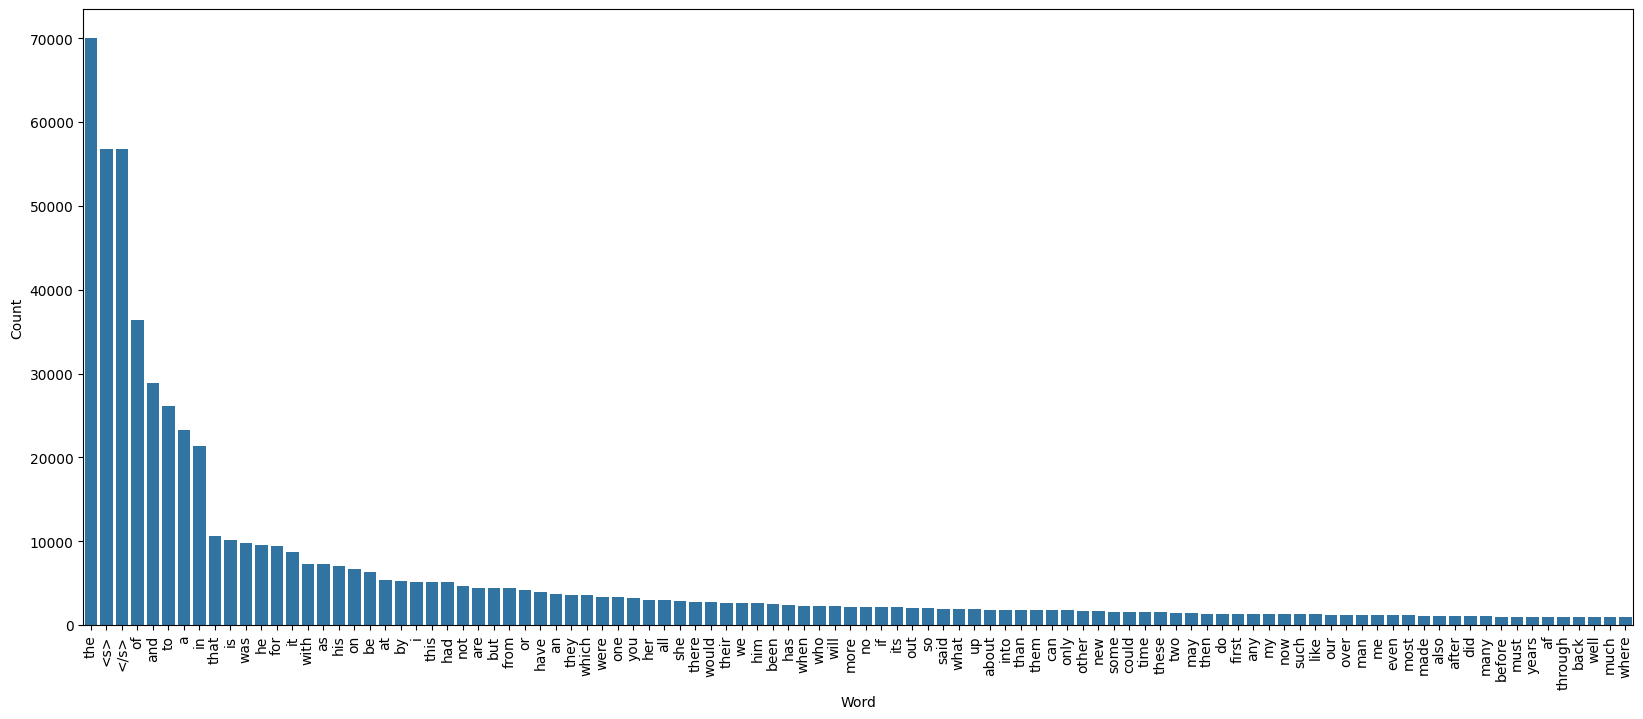

In [ ]:
# plot the word_counts using seaborn
df = pd.DataFrame(list(word_counts.items()), columns=['word', 'count'])
df = df.sort_values(by='count', ascending=False)
plt.figure(figsize=(20, 8))
sns.barplot(x='word', y='count', data=df[:100])
plt.xticks(rotation=90)
plt.xlabel('Word')
plt.ylabel('Count')

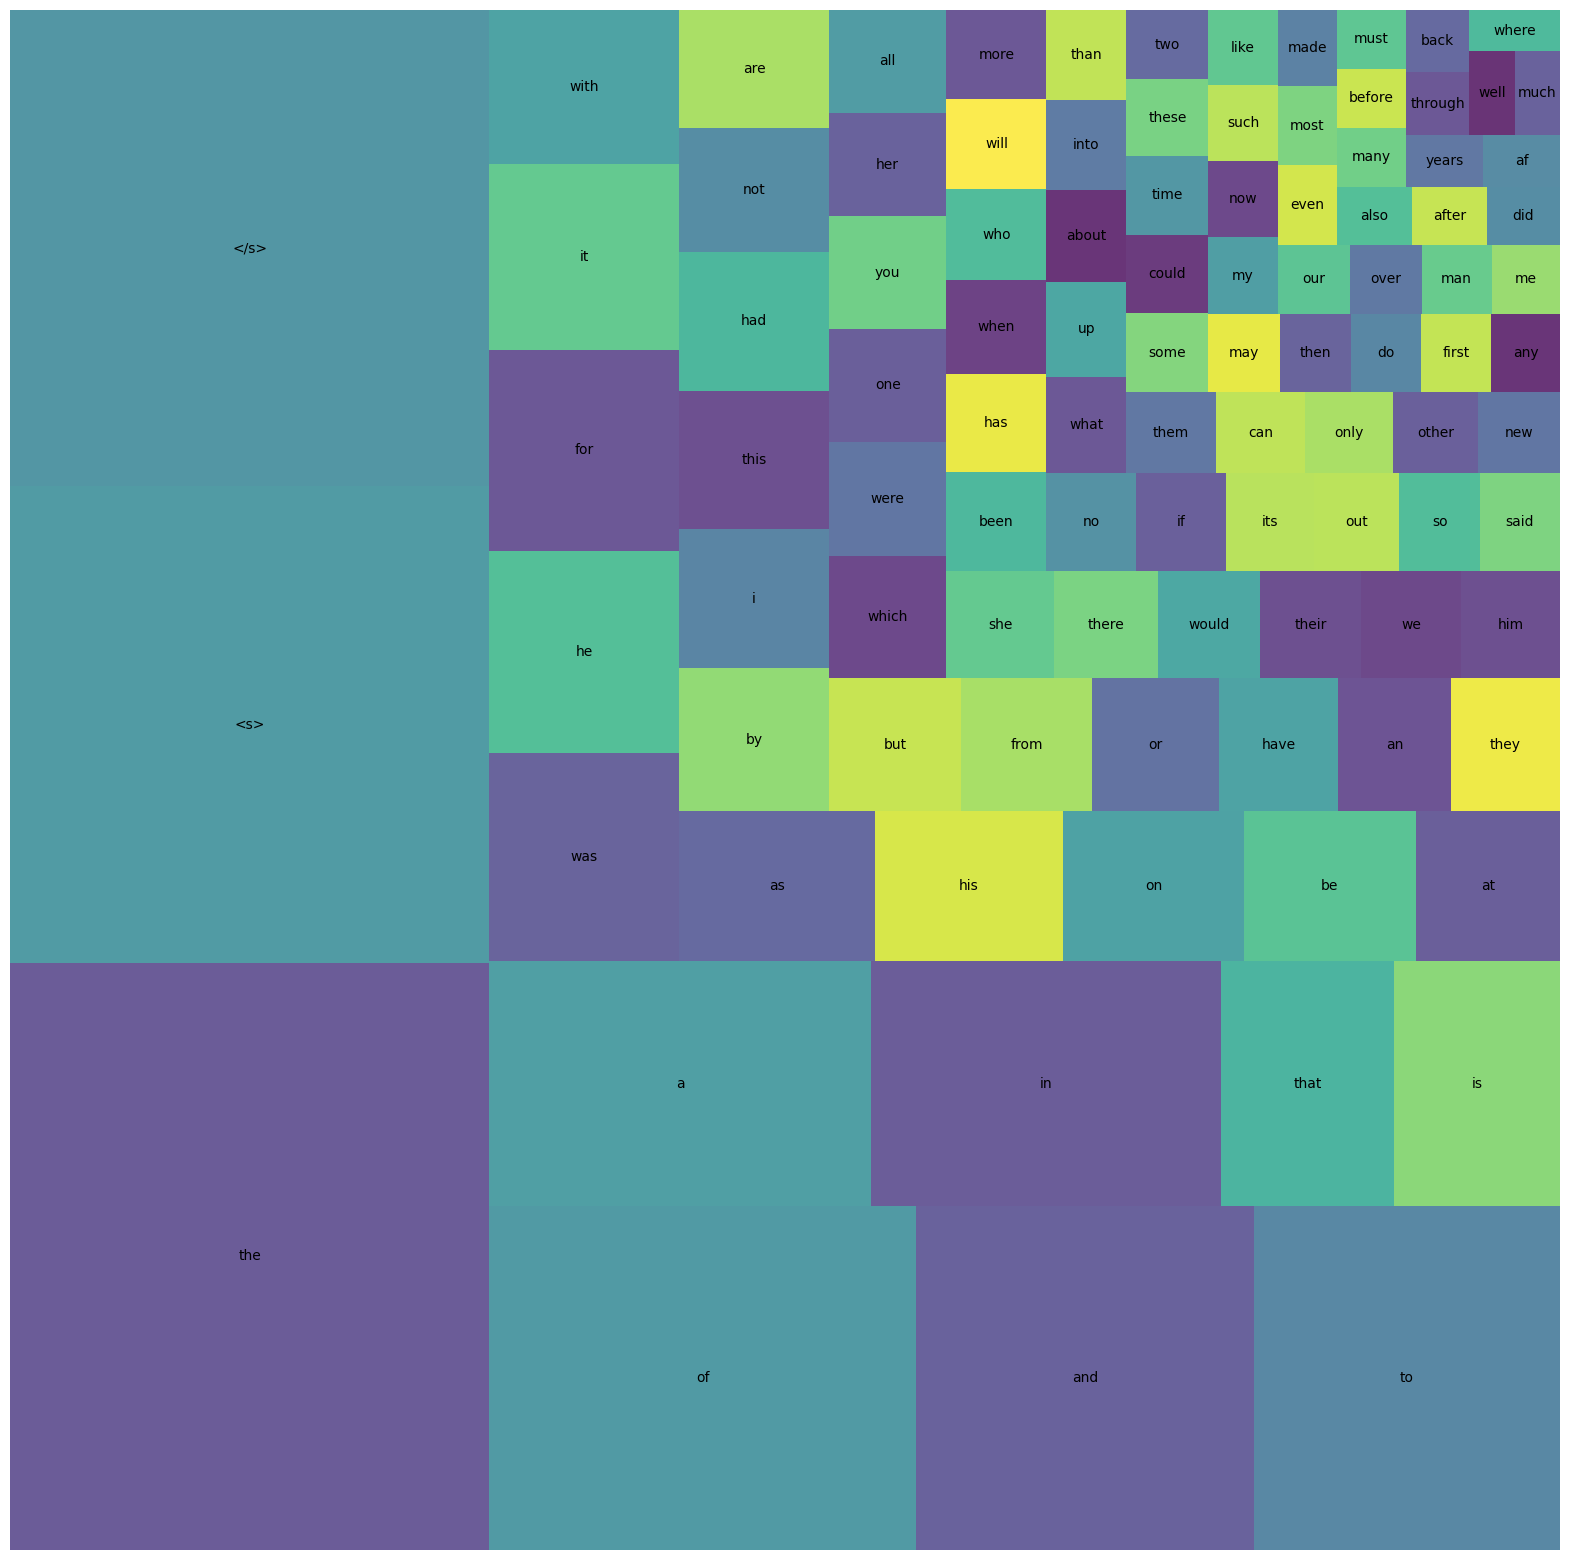

In [ ]:
# plot the word_counts using seaborn and squarify as treemap
df = pd.DataFrame(list(word_counts.items()), columns=['word', 'count'])
df = df.sort_values(by='count', ascending=False).iloc[:100]
plt.figure(figsize=(20, 20))
squarify.plot(sizes=df['count'].values, label=df['word'].values, alpha=.8)
plt.axis('off')
plt.show()



# N-Gram Model

## Build the N-Gram Model

### Building an N-Gram Language Model for Text Generation and Perplexity Calculation


In [ ]:
class NGramModel:
    """An n-gram model for generating and evaluating text based on n-gram probabilities."""

    def __init__(self, sentences, n, k):
        """
        Initializes the n-gram model with given parameters.

        Args:
            sentences (list of list of str): List of tokenized sentences.
            n (int): The order of the n-gram model (e.g., 2 for bigram, 3 for trigram).
            k (float): Smoothing parameter for Add-k smoothing.
        """

        # Store the list of tokenized sentences, n-gram order, and smoothing parameter
        self.sentences = sentences
        self.n = n
        self.k = k

        # Dictionary to store computed n-gram probabilities
        self.probabilities = {}

        # Counters for n-gram and (n-1)-gram context counts
        # These will hold the frequency counts of n-grams and their contexts
        self.ngram_counts = Counter()
        self.context_counts = Counter()

        # List to store all generated n-grams from the corpus
        self.n_grams = []

        # Get the frequency of each word in the dataset
        # The unique vocabulary is stored as a dictionary with word frequencies
        self.unique_vocabulary = self.get_word_frequencies(sentences)

        # Calculate and store the vocabulary size (number of unique words in the corpus)
        self.vocabulary_size = len(self.unique_vocabulary)

        # Print the vocabulary size as an informative message
        print(f"Vocabulary size: {self.vocabulary_size}")

        # Define a special token for unknown words
        self.UNK = "<UNK>"

    def get_word_frequencies(self, dataset):
        """
        Calculates the frequency of each word in the dataset.

        Args:

        - dataset: list of lists, where each inner list represents a sentence as a list of words.

        Returns:
        - word_freq: dict, a dictionary mapping each word to its frequency in the dataset.
        """

        # Initialize an empty dictionary to store word frequencies
        word_freq = {}

        # Loop through each sentence in the dataset
        for sentence in dataset:
            # Loop through each word in the sentence
            for word in sentence:
                # Update the word's count in word_freq, initializing to 1 if not present
                word_freq[word] = word_freq.get(word, 0) + 1

        return word_freq  # Return the completed dictionary of word frequencies

    def generate_ngrams(self, tokenized_sentences, n):
        """
        Generates n-grams from a list of tokenized sentences.

        Args:
        - tokenized_sentences: list of lists, where each inner list is a sentence represented as tokens.
        - n: int, the n-gram order (e.g., 2 for bigrams, 3 for trigrams).

        Returns:
        - n_grams: list of tuples, each representing an n-gram.
        """

        n_grams = []  # List to store generated n-grams

        # Process each sentence individually
        for sentence in tokenized_sentences:
            # Add start tokens and end token based on the n-gram order to manage sentence boundaries
            sentence = ['<s>'] * (n - 1) + sentence + ['</s>']

            # Generate n-grams from the sentence and add them to the list
            n_grams.extend(list(ngrams(sentence, n)))

        return n_grams


    def count_ngrams(self, ngrams):
        """
        Counts the occurrences of each n-gram in the provided list of n-grams.

        Args:
        - ngrams: list of tuples, each representing an n-gram sequence.

        Returns:
        - ngram_counts: Counter object with counts of each n-gram.
        """
        # Initialize counters for n-grams
        ngram_counts = Counter()

        # Count each n-gram's occurrences in the list
        for ngram in ngrams:
            ngram_counts[ngram] += 1

        return ngram_counts

    def calculate_probabilities(self):
        """
        Calculates the probabilities of each n-gram with add-k smoothing.
        """
        self.probabilities = {}

        # Calculate probability for each n-gram in the model
        for ngram, count in self.ngram_counts.items():
            # Extract the context (n-1 preceding words)
            n_minus1_gram = ngram[:-1]

            # Apply add-k smoothing
            # Increment n-gram count by 1 + k for smoothing to avoid zero probabilities
            n_gram_count = self.ngram_counts.get(ngram, 0) + 1 + self.k

            # Increment (n-1)-gram context count by k * vocabulary size for smoothing across all possible words
            n_minus1_gram_count = self.context_counts.get(n_minus1_gram, 0) + self.k * self.vocabulary_size

            # Calculate the smoothed probability and store it
            self.probabilities[ngram] = n_gram_count / n_minus1_gram_count

    def fit(self):
        """
        Fits the n-gram model to the given sentences by generating n-grams,
        counting occurrences, and calculating probabilities.
        """
        # Generate n-grams for both n and (n-1) lengths
        # n-grams represent sequences of n tokens, and (n-1)-grams represent the context for each n-gram
        self.n_grams = self.generate_ngrams(self.sentences, self.n)
        self.n_minus1_gram = self.generate_ngrams(self.sentences, self.n - 1)

        # Count occurrences of each n-gram and (n-1)-gram context
        # These counts are essential for calculating probabilities
        self.ngram_counts = self.count_ngrams(self.n_grams)
        self.context_counts = self.count_ngrams(self.n_minus1_gram)

        # Calculate probabilities for each n-gram based on counts
        self.calculate_probabilities()

    def get_candidates(self, context):
        """
        Retrieves candidate next words and their probabilities for a given context.

        Args:
        - context: tuple, the current context (n-1 words) for which to find the next word.

        Returns:
        - dict: A dictionary mapping each candidate word to its probability as a next word given the context.
        """

        # Ensure the context is a tuple, matching the expected format
        context = tuple(context)

        # Retrieve all n-grams that match the provided context
        # Each n-gram's last word is a possible next word for the context
        candidates = {ngram[-1]: prob for ngram, prob in self.probabilities.items() if ngram[:-1] == context}

        # Return None if no candidates are found for the context
        if not candidates:
            return None
        return candidates


    def generate_text(self, text=None, max_length=10, random_generations=False):
        """
        Generate a sequence of text using the trained n-gram model.

        Args:
        - text: str, initial text to start the generation. Defaults to None.
        - max_length: int, maximum length of generated text. Defaults to 10.
        - random_generations: bool, if True, generates text using probabilities for next word selection;
                              if False, chooses the most likely word at each step.

        Returns:
        - result: dict, containing the generated text, word information, sentence probability,
                  cross-entropy, and perplexity.
        """

        # If initial text is provided, set the starting context
        if text:
            text_tokens = text.split()
            # Pad with start tokens if initial text is shorter than (n-1)
            if len(text_tokens) < self.n - 1:
                text_tokens = ['<s>'] * (self.n - 1 - len(text_tokens)) + text_tokens
            current = tuple(text_tokens[-(self.n - 1):])  # Set the initial context for n-grams
            generated_text = text_tokens
        else:
            # Start with start tokens if no initial text is provided
            current = tuple(['<s>'] * (self.n - 1))
            generated_text = []

        words_information = []  # List to store each generated word's information

        # Generate up to the specified maximum length
        for _ in range(max_length):
            word_info = {}
            if current in self.context_counts:
                # Get possible next words and their probabilities
                candidates = self.get_candidates(current)
                if not candidates:
                    break  # Stop if no candidates are found

                if random_generations:
                    # Choose the next word based on probabilities
                    next_word = random.choices(list(candidates.keys()), weights=list(candidates.values()))[0]
                    probability = candidates[next_word]
                else:
                    # Choose the word with the highest probability
                    next_word = max(candidates, key=candidates.get)
                    probability = candidates[next_word]

                # Store the chosen word and its probability
                word_info["word"] = next_word
                word_info["probability"] = probability
                words_information.append(word_info)

            else:
                break  # Stop if the context is not in the model

            if next_word == '</s>':
                break  # Stop if the end token is generated

            generated_text.append(next_word)
            # Update current context to the last n-1 words
            current = tuple((current + (next_word,))[1:])

        # Remove start and end tokens from the generated text
        final_text = [word for word in generated_text if word not in ('<s>', '</s>')]
        text = " ".join(final_text)

        # Calculate sentence probability, cross-entropy, and perplexity
        sentence_probability = self.get_sentence_probability(final_text)
        cross_entropy = self.get_cross_entropy(final_text)
        sentence_perplexity = self.get_perplexity(final_text)

        # Build the result dictionary
        result = {
            "text": text,
            "words_information": words_information,
            "sentence_probability": sentence_probability,
            "cross_entropy": cross_entropy,
            "sentence_perplexity": sentence_perplexity,
        }

        return result


    def get_sentence_probability(self, sentence):
        """
        Compute the probability of a sentence using the trained n-gram model.

        Args:
        - sentence: list of words (tokens) representing the sentence.

        Returns:
        - probability: float representing the probability of the sentence.
        """

        # Add start and end tokens to the sentence to form n-grams
        tokens = ['<s>'] * (self.n - 1) + sentence + ['</s>']

        # Initialize the sentence probability to 1.0 (multiplicative identity)
        probability = 1.0

        # Iterate over each n-gram in the sentence
        for i in range(len(tokens) - self.n + 1):
            # Extract the n-gram (current word and preceding words for context)
            n_gram = tuple(tokens[i:i + self.n])

            # Extract the (n-1)-gram context (all but the last word in the n-gram)
            n_minus1_gram = tuple(tokens[i:i + self.n - 1])

            # Get the count of the n-gram with add-one smoothing
            # Adding 1 + k helps avoid zero probabilities for unseen n-grams
            n_gram_count = self.ngram_counts.get(n_gram, 0) + 1 + self.k

            # Get the count of the (n-1)-gram context, also using smoothing
            # The context count is adjusted by k * vocabulary size to account for all possible next words
            n_minus1_gram_count = self.context_counts.get(n_minus1_gram, 0) + self.k * self.vocabulary_size

            # Calculate the probability of the current n-gram
            prob = n_gram_count / n_minus1_gram_count

            # Multiply the probability of the current n-gram with the cumulative probability
            probability *= prob

        return probability



    def get_cross_entropy(self, sentence):
        """
        Calculates the cross-entropy of a given sentence based on n-gram probabilities.

        Args:
        - sentence: list of words (tokens) representing the sentence.

        Returns:
        - cross_entropy: float representing the cross-entropy of the sentence.
        """

        # Add start and end tokens to the sentence to form n-grams
        tokens = ['<s>'] * (self.n - 1) + sentence + ['</s>']

        # Length of the sentence (excluding start tokens, but including the end token)
        N = len(sentence)

        # Initialize the cumulative log probability of the sentence
        log_probability = 0.0

        # Iterate over each n-gram in the sentence
        for i in range(len(tokens) - self.n + 1):
            # Extract the n-gram (current word and preceding words for context)
            n_gram = tuple(tokens[i:i + self.n])

            # Extract the (n-1)-gram context (all but the last word in the n-gram)
            n_minus1_gram = tuple(tokens[i:i + self.n - 1])

            # Get the count of the n-gram with add-one smoothing
            # The count is increased by 1 plus the smoothing constant 'k' to avoid zero probabilities
            n_gram_count = self.ngram_counts.get(n_gram, 0) + 1 + self.k

            # Get the count of the (n-1)-gram context, also with add-one smoothing
            # The context count is adjusted by k * vocabulary size for smoothing across all possible words
            n_minus1_gram_count = self.context_counts.get(n_minus1_gram, 0) + self.k * self.vocabulary_size

            # Calculate the probability of the current n-gram
            prob = n_gram_count / n_minus1_gram_count

            # Add the log of the probability to the cumulative log probability
            log_probability += math.log(prob)

        # Calculate cross-entropy by dividing the negative log probability by the sentence length
        cross_entropy = -log_probability / N

        return cross_entropy

    def get_perplexity(self, sentence):
        """
        Calculate the perplexity of a given sentence based on n-gram probabilities.

        Args:
        - sentence: list of words (tokens) representing the sentence.

        Returns:
        - perplexity: float representing the perplexity of the sentence.
        """

        # Add start and end tokens to form n-grams
        tokens = ['<s>'] * (self.n - 1) + sentence + ['</s>']

        # Length of the sentence (excluding start tokens, but including the end token)
        N = len(sentence)

        # Initialize the log probability of the sentence
        log_probability = 0.0

        # Iterate over each n-gram in the sentence
        for i in range(len(tokens) - self.n + 1):
            # Extract the n-gram (current word and preceding words for context)
            n_gram = tuple(tokens[i:i + self.n])

            # Extract the (n-1)-gram context (all but the last word in the n-gram)
            n_minus1_gram = tuple(tokens[i:i + self.n - 1])

            # Get the count of the n-gram with add-one smoothing
            # n_gram_count is increased by 1 plus the smoothing constant 'k' to avoid zero probabilities
            n_gram_count = self.ngram_counts.get(n_gram, 0) + 1 + self.k

            # Get the count of the (n-1)-gram context, also using smoothing
            # The context count is adjusted by k * vocabulary size to handle smoothing across all possible words
            n_minus1_gram_count = self.context_counts.get(n_minus1_gram, 0) + self.k * self.vocabulary_size

            # Calculate the probability of the current n-gram
            prob = n_gram_count / n_minus1_gram_count

            # Add the log of the probability to the cumulative log probability
            log_probability += math.log(prob)

        # Calculate the perplexity by exponentiating the negative average log probability
        perplexity = math.exp(-log_probability / N)

        return perplexity


In [ ]:
# Instantiate the NGramModel with a trigram model (n=3) and smoothing parameter k=0.1
n_gram = NGramModel(processed_dataset, 3, 0.0000001)

# Fit the model to the processed dataset
# This step builds the n-gram model by counting occurrences of trigrams and converting them to probabilities
n_gram.fit()



Vocabulary size: 48019


In [ ]:
# Generate text using the n-gram model starting with the phrase 'he is'
# Set max_length to 20, meaning the generated text will be up to 20 words long
# Enable random_generations to select the next word randomly based on observed probabilities
n_gram.generate_text('he is', max_length=5, random_generations=False)


{'text': 'he is a good deal of time',
 'words_information': [{'word': 'a', 'probability': 0.15063870752561004},
  {'word': 'good', 'probability': 0.02399986840575075},
  {'word': 'deal', 'probability': 0.11914650200175336},
  {'word': 'of', 'probability': 0.6295176747806471},
  {'word': 'time', 'probability': 0.09373593716885341}],
 'sentence_probability': 1.1301738434615022e-08,
 'cross_entropy': 2.6140441827556593,
 'sentence_perplexity': 13.65415925790195}

In [ ]:
# Generate text using the n-gram model starting with the phrase 'he is'
# Set max_length to 20, meaning the generated text will be up to 20 words long
# Enable random_generations to select the next word randomly based on observed probabilities
n_gram.generate_text('he is', max_length=5, random_generations=False)


{'text': 'he is a good deal of time',
 'words_information': [{'word': 'a', 'probability': 0.15063870752561004},
  {'word': 'good', 'probability': 0.02399986840575075},
  {'word': 'deal', 'probability': 0.11914650200175336},
  {'word': 'of', 'probability': 0.6295176747806471},
  {'word': 'time', 'probability': 0.09373593716885341}],
 'sentence_probability': 1.1301738434615022e-08,
 'cross_entropy': 2.6140441827556593,
 'sentence_perplexity': 13.65415925790195}

# Part 02
 After completing question 1, make simple predictions using the
language model you built in question 1. Start with the words “I am,” and
let your n-gram model predict the next word. Show both the code and
the model-generated results. (15 pts)


In [ ]:
# Generate text using the n-gram model with the starting phrase 'i am'
# Set max_length to 1, so only one word will be generated after the initial phrase
result = n_gram.generate_text('i am', max_length=1)

# Print the generated text
print(f"Generated text: {result['text']}")

# Print only the predicted next word
print(f"The next word is: {result['text'].split()[-1]}")
print(f"The next word probability is: {result['words_information'][0]['probability']}")



Generated text: i am not
The next word is: not
The next word probability is: 0.12077014576732871



 # part 03 Part 04  and Part 05


In [ ]:
# Generate different sentences starting with the n-gram model
result = []  # Initialize an empty list to store the generated texts

# Loop to generate 10 different sentences
for i in range(10):
    # Use the n-gram model to generate text starting with 'you are'
    # Set max_length to 20 to limit the sentence length
    # Enable random_generations to add randomness in word selection based on probabilities

    text = n_gram.generate_text('you are', max_length=20, random_generations=True)

    # Append the generated text dictionary to the result list
    result.append(text)

    # Print a newline for readability
    print("\n")

    # Print the index and the generated text
    print(f"Generated text {i}: {text['text']}")

    # Print the total probability of the generated sentence
    print(f"Sentence probability: {text['sentence_probability']}")

    # Print the total cross entropy of the generated sentence
    print(f"Cross entropy: {text['cross_entropy']}")

    # Print the perplexity of the generated sentence
    print(f"Perplexity: {text['sentence_perplexity']}")

    # Print detailed information about each word in the generated sentence
    print(f"Words information: {text['words_information']}")

    # Print a newline for readability
    print("\n")

    # Print a separator line of 100 '#' characters for visual separation between outputs
    print("#" * 100)

    # Print a newline for readability
    print("\n")




Generated text 0: you are being introduced by the wind had the exquisitely willowy form of regime what particular issue with this veterans previous medical
Sentence probability: 4.373047243329868e-14
Cross entropy: 1.398215055733187
Perplexity: 4.047968117057555
Words information: [{'word': 'being', 'probability': 0.020832639331591622}, {'word': 'introduced', 'probability': 0.048774777765723094}, {'word': 'by', 'probability': 0.9976048506338706}, {'word': 'the', 'probability': 0.5994243448476951}, {'word': 'wind', 'probability': 0.0014803797123350549}, {'word': 'had', 'probability': 0.08331666757058302}, {'word': 'the', 'probability': 0.9976048506338706}, {'word': 'exquisitely', 'probability': 0.017698363842713834}, {'word': 'willowy', 'probability': 1.9904421956208482}, {'word': 'form', 'probability': 1.9904421956208482}, {'word': 'of', 'probability': 1.9904421956208482}, {'word': 'regime', 'probability': 0.0194165714909258}, {'word': 'what', 'probability': 1.9904421956208482}, {'wo

In [ ]:
# Create Datafrmae to collect all the model result
result = pd.DataFrame(result)
result

,text,words_information,sentence_probability,cross_entropy,sentence_perplexity
0,you are being introduced by the wind had the e...,"[{'word': 'being', 'probability': 0.0208326393...",4.373047e-14,1.398215,4.047968
1,you are putting strong pressure on the annual ...,"[{'word': 'putting', 'probability': 0.01388842...",3.505172e-17,1.722259,5.597160
2,you are writing a new spinning takeup machine ...,"[{'word': 'writing', 'probability': 0.01388842...",2.059780e-15,1.537099,4.651078
3,you are in physical factors such as shipping e...,"[{'word': 'in', 'probability': 0.0416652779687...",4.826184e-09,0.870419,2.387910
4,you are reading marks my 15th anniversary,"[{'word': 'reading', 'probability': 0.01388842...",1.074503e-04,1.305497,3.689524
5,you are really responsible we will gladly ente...,"[{'word': 'really', 'probability': 0.020832639...",9.818881e-07,1.064138,2.898338
6,you are of course that the leader of the openi...,"[{'word': 'of', 'probability': 0.0138884264525...",8.757943e-18,1.785299,5.961360
7,you are young and sensitive experts,"[{'word': 'young', 'probability': 0.0208326393...",8.009646e-07,2.339575,10.376824
8,you are going to tell the guy had been famous ...,"[{'word': 'going', 'probability': 0.0277768522...",3.294872e-13,1.916083,6.794290
9,you are working to russias advantage,"[{'word': 'working', 'probability': 0.01388842...",3.617310e-06,2.088297,8.071155


In [ ]:
# Get the total perplexity for the 10 sentences
print(f"mean perplexity: {np.mean(result.sentence_perplexity)}")


mean perplexity: 5.44756083733553


# Part 06

In [ ]:
import google.generativeai as genai

genai.configure(api_key="API Key")


In [ ]:
class Gemini():
    def __init__(self, model_name: str, temperature: float, system_instruction: str):
        """Initializes the Gemini model for generating text responses."""

        # Store the model name
        self.model_name = model_name

        # Configure generation settings for the model
        self.generation_config = {
            "temperature": temperature,
            "top_p": 0.95,
            "top_k": 40,
            "max_output_tokens": 8192,
            "response_mime_type": "text/plain"
        }

        # Initialize the model with specified name, config, instructions, and safety settings
        self.model = genai.GenerativeModel(
            model_name=self.model_name,
            generation_config=self.generation_config,
            system_instruction=system_instruction,
            safety_settings={
                'HATE': 'high',
                'HARASSMENT': 'high',
                'SEXUAL': 'high',
                'DANGEROUS': 'high',
            }
        )



    def send_message(self, message: str):
        """Sends a message to the model and feeds the output back iteratively. in a chain of thoughts"""
        # Initialize an empty list to store messages
        self.messages = []
        # Start the conversation with the initial user message
        user_message = {
            "parts": [message],
            "role": "user"
        }
        self.messages = [user_message]  # Reset the messages list

        # Start the chain of thought
        # First in the first iteration the model generate the instructions and infromation to write the story
        # Second in the second iteration ask the model to genrate the story from the infromation that be generated from first iteration
        for _ in range(2):
            # Generate the response
            response = self.model.generate_content(self.messages)

            # Add the model response to the conversation
            assistant_message = {
                "parts": [response.text],
                "role": "assistant"  # Use "assistant" instead of "model" if needed
            }
            self.messages.append(assistant_message)

            # Feed a follow-up prompt
            follow_up_message = {
                "parts": ["write the story now from the above information make sure the story is 500 words"],
                "role": "user"
            }
            self.messages.append(follow_up_message)

        return response  # Return the last generated text content

    def __call__(self, message: str):
        """Makes the class instance callable, sending a message to the model directly."""

        # Call send_message to get a response from the model
        response = self.send_message(message)
        return response


In [ ]:
# initilize the llm model with system system_instruction that will allow the model to work in chain of thoughts behave
LLM = Gemini(model_name="gemini-1.5-flash-002",
            temperature=1.0,
            system_instruction="""
You are an advanced language model tasked with creating a captivating story based on the input sentence provided by the user.
Develop the story in a step-by-step chain of thought, covering the following stages to build a cohesive and engaging narrative, up to 500 words in length and appropriate for all audiences.
Ensure that the story contains no derogatory, toxic, violent, harassing, hateful, sexual, or otherwise inappropriate content. Use rich and imaginative language to make the story engaging.

Stages:

Interpret the Setting and Tone: Based on the input sentence, identify the genre, setting, and tone. Is it fantasy, adventure, mystery, or something else? Establish a time and place if needed.

Introduce the Main Character(s):
1. Describe the main character(s) briefly.
2. Include relevant details that will drive their actions, like personality traits or backstory hints.
3. Set Up the Conflict or Goal: Identify the problem or goal that motivates the character(s). What do they want or need to achieve, and why?
4. Develop the Story Arc: Outline the main events or challenges the character(s) will face. Describe how these events build suspense and reveal more about their personalities or the world around them.
5. Resolve the Conflict or Goal: Conclude the story with a satisfying resolution to the conflict or goal. Aim to leave readers with a feeling of closure, even if questions remain for future stories.
6. Polish for Engagement: Use vivid language, metaphor, and sensory detail to enhance the reader's experience, ensuring clarity and cohesiveness.
7. Proceed through each stage in sequence to craft a story that flows logically and captures the reader’s interest.""")

In [ ]:
# Initialize an empty list to store the generated story texts
generated_text_list = []

# Loop through each text in the 'text' column of the result DataFrame
for i, text in enumerate(result['text']):
    # Generate a story based on the input text using the LLM model
    generated_text = LLM(text)

    # Append only the 'text' part of the generated response to the list
    generated_text_list.append(generated_text.text)

    # Print the original input text for reference
    print("\n")
    print(f"Generated text {i}: {text}")
    print("\n")

    # Print the generated story text
    print(generated_text)
    print("\n")
    print("#" * 100)
    print("\n")




Generated text 0: you are being introduced by the wind had the exquisitely willowy form of regime what particular issue with this veterans previous medical


response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "The wind sang secrets in Elara\u2019s ears as she examined Captain Theron.  His skin, once tanned and strong, was now pale and marked with iridescent scars that seemed to shift and shimmer with the wind\u2019s breath.  He was a husk of the man he once was, his eyes hollow, his frame weakened by an unseen ailment.  The regime\u2019s physicians had failed him, leaving him broken and riddled with strange, ethereal pains.  He clutched a worn leather pouch, his knuckles white. Inside, he claimed, lay the only clue to his salvation \u2013 and perhaps the unraveling of a dark secret.\n\nElara, a wisp of a wo

In [ ]:
# Add the generated te xt by the llm to result dataframe
result['generated_text'] = generated_text_list
result

,text,words_information,sentence_probability,cross_entropy,sentence_perplexity,generated_text
0,you are being introduced by the wind had the e...,"[{'word': 'being', 'probability': 0.0208326393...",4.373047e-14,1.398215,4.047968,The wind sang secrets in Elara’s ears as she e...
1,you are putting strong pressure on the annual ...,"[{'word': 'putting', 'probability': 0.01388842...",3.505172e-17,1.722259,5.597160,The air in Aetheria Press’s archive hung heavy...
2,you are writing a new spinning takeup machine ...,"[{'word': 'writing', 'probability': 0.01388842...",2.059780e-15,1.537099,4.651078,The biting Christmas Eve wind whipped around E...
3,you are in physical factors such as shipping e...,"[{'word': 'in', 'probability': 0.0416652779687...",4.826184e-09,0.870419,2.387910,The biting wind howled a mournful song as Elar...
4,you are reading marks my 15th anniversary,"[{'word': 'reading', 'probability': 0.01388842...",1.074503e-04,1.305497,3.689524,The worn leather of the book felt comforting b...
5,you are really responsible we will gladly ente...,"[{'word': 'really', 'probability': 0.020832639...",9.818881e-07,1.064138,2.898338,The moonbeams danced on Pip’s iridescent wings...
6,you are of course that the leader of the openi...,"[{'word': 'of', 'probability': 0.0138884264525...",8.757943e-18,1.785299,5.961360,"The stadium lights blazed, transforming the fi..."
7,you are young and sensitive experts,"[{'word': 'young', 'probability': 0.0208326393...",8.009646e-07,2.339575,10.376824,"The sun, a molten gold, filtered weakly throug..."
8,you are going to tell the guy had been famous ...,"[{'word': 'going', 'probability': 0.0277768522...",3.294872e-13,1.916083,6.794290,"The low hum of conversation in ""The Velvet Cur..."
9,you are working to russias advantage,"[{'word': 'working', 'probability': 0.01388842...",3.617310e-06,2.088297,8.071155,The crisp Geneva air bit at Anya Petrova’s che...


In [ ]:
result.to_excel("result.xlsx", index=False)